In [2]:
# Comparative Study of MH AND MP
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import warnings
import glob ,os 
import statsmodels.api as sm
from sklearn import linear_model

In [3]:
maha=pd.read_csv("MaharashtraNew.csv")
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,10192975.0,24603175.0,8055213.0,40988240.0,11783628.0,58450931.0,128036944.0
2,2012.0,10005668.0,26616569.0,7751740.0,43074568.0,12740105.0,63324460.0,135794185.0
3,2013.0,11865366.0,29276153.0,8046688.0,44411243.0,14437695.0,68450933.0,145161464.0
4,2014.0,9883332.0,30765117.0,8680703.0,47968559.0,15560592.0,74685393.0,154316487.0
5,2015.0,9142618.0,34088245.0,8847319.0,52192116.0,16511000.0,80220792.0,165428361.0
6,2016.0,11431358.0,36416354.0,9326105.0,55285010.0,17421073.0,87223399.0,180704575.0
7,2017.0,10850708.0,37360205.0,9513159.0,57211024.0,17897893.0,92261396.0,188870619.0
8,2018.0,10024698.0,38739147.0,9873084.0,59239081.0,18282085.0,97476933.0,197295970.0
9,2019.0,10809323.0,38283541.0,9528053.0,58159195.0,18917799.0,103847183.0,204398250.0


In [4]:
MP=pd.read_csv("Madhya Pradesh.csv")
MP

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV Banking,GAV Services,GDP/ Capita
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,7333369.0,3828625.0,3495447.0,9398394.0,1593654.0,11863234.0,31556159.0
2,2012.0,9395310.0,3950229.0,3249077.0,9469736.0,1709455.0,13011009.0,35168262.0
3,2013.0,9213657.0,3665391.0,3519458.0,9529265.0,1851951.0,13682614.0,36513394.0
4,2014.0,9332505.0,3758955.0,3573333.0,9917767.0,1894142.0,14420526.0,38394448.0
5,2015.0,8949745.0,4823080.0,3603975.0,11443201.0,2162322.0,15570721.0,41873574.0
6,2016.0,11775864.0,5320558.0,3741354.0,11914669.0,2073191.0,16723193.0,47066916.0
7,2017.0,11506489.0,5732036.0,4029161.0,13074838.0,2094959.0,17833951.0,49710165.0
8,2018.0,11294535.0,7338744.0,4639363.0,15702953.0,2121812.0,19528842.0,54323489.0
9,2019.0,12891544.0,7053192.0,4409117.0,15028501.0,2146550.0,20542244.0,57555384.0


In [5]:
maha.shape


(12, 8)

In [6]:
MP.shape

(12, 8)

In [7]:
maha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          11 non-null     float64
 1   GAV Agri      10 non-null     float64
 2   GAV Manf      10 non-null     float64
 3   GAV Cons      10 non-null     float64
 4   GAV Ind       10 non-null     float64
 5   GAV banking   10 non-null     float64
 6   GAV Services  10 non-null     float64
 7   GDP/Capita    10 non-null     float64
dtypes: float64(8)
memory usage: 896.0 bytes


In [8]:
MP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          11 non-null     float64
 1   GAV Agri      11 non-null     float64
 2   GAV Manf      11 non-null     float64
 3   GAV Cons      11 non-null     float64
 4   GAV Ind       11 non-null     float64
 5   GAV Banking   11 non-null     float64
 6   GAV Services  11 non-null     float64
 7   GDP/ Capita   11 non-null     float64
dtypes: float64(8)
memory usage: 896.0 bytes


In [9]:
mean_gdp=maha['GDP/Capita'].mean()
mean_gdp

168893752.1

In [10]:
mean_gdp=MP['GDP/ Capita'].mean()
mean_gdp

46434413.81818182

In [11]:
std_gdp=maha['GDP/Capita'].std()
std_gdp

26997718.467765104

In [12]:
std_gdp=MP['GDP/ Capita'].std()
std_gdp

10377880.159553027

In [13]:
# GDP growth rate 
maha['Growth Rate']=maha['GDP/Capita'].pct_change()*100
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,10192975.0,24603175.0,8055213.0,40988240.0,11783628.0,58450931.0,128036944.0,NaN
2,2012.0,10005668.0,26616569.0,7751740.0,43074568.0,12740105.0,63324460.0,135794185.0,6.058596
3,2013.0,11865366.0,29276153.0,8046688.0,44411243.0,14437695.0,68450933.0,145161464.0,6.898144
4,2014.0,9883332.0,30765117.0,8680703.0,47968559.0,15560592.0,74685393.0,154316487.0,6.306786
5,2015.0,9142618.0,34088245.0,8847319.0,52192116.0,16511000.0,80220792.0,165428361.0,7.200704
6,2016.0,11431358.0,36416354.0,9326105.0,55285010.0,17421073.0,87223399.0,180704575.0,9.234338
7,2017.0,10850708.0,37360205.0,9513159.0,57211024.0,17897893.0,92261396.0,188870619.0,4.519002
8,2018.0,10024698.0,38739147.0,9873084.0,59239081.0,18282085.0,97476933.0,197295970.0,4.460911
9,2019.0,10809323.0,38283541.0,9528053.0,58159195.0,18917799.0,103847183.0,204398250.0,3.599810


In [14]:
# GDP growth rate 
MP['Growth Rate']=MP['GDP/ Capita'].pct_change()*100
MP

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV Banking,GAV Services,GDP/ Capita,Growth Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011.0,7333369.0,3828625.0,3495447.0,9398394.0,1593654.0,11863234.0,31556159.0,NaN
2,2012.0,9395310.0,3950229.0,3249077.0,9469736.0,1709455.0,13011009.0,35168262.0,11.446586
3,2013.0,9213657.0,3665391.0,3519458.0,9529265.0,1851951.0,13682614.0,36513394.0,3.824846
4,2014.0,9332505.0,3758955.0,3573333.0,9917767.0,1894142.0,14420526.0,38394448.0,5.151682
5,2015.0,8949745.0,4823080.0,3603975.0,11443201.0,2162322.0,15570721.0,41873574.0,9.061534
6,2016.0,11775864.0,5320558.0,3741354.0,11914669.0,2073191.0,16723193.0,47066916.0,12.402433
7,2017.0,11506489.0,5732036.0,4029161.0,13074838.0,2094959.0,17833951.0,49710165.0,5.615938
8,2018.0,11294535.0,7338744.0,4639363.0,15702953.0,2121812.0,19528842.0,54323489.0,9.280444
9,2019.0,12891544.0,7053192.0,4409117.0,15028501.0,2146550.0,20542244.0,57555384.0,5.949351


In [15]:
Avg_Growth_Rate=maha['Growth Rate'].mean()
Avg_Growth_Rate

4.071091651824342

In [16]:
Avg_Growth_Rate=MP['Growth Rate'].mean()
Avg_Growth_Rate

7.09365292628739

In [17]:
null_values=maha.isnull().sum()
print(null_values)

Year            1
GAV Agri        2
GAV Manf        2
GAV Cons        2
GAV Ind         2
GAV banking     2
GAV Services    2
GDP/Capita      2
Growth Rate     2
dtype: int64


In [18]:
#Finding Null values 
null_values=MP.isnull().sum()
print(null_values)

Year            1
GAV Agri        1
GAV Manf        1
GAV Cons        1
GAV Ind         1
GAV Banking     1
GAV Services    1
GDP/ Capita     1
Growth Rate     2
dtype: int64


In [19]:
#Deleting the 0th row
maha=maha.drop(0)
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
1,2011.0,10192975.0,24603175.0,8055213.0,40988240.0,11783628.0,58450931.0,128036944.0,NaN
2,2012.0,10005668.0,26616569.0,7751740.0,43074568.0,12740105.0,63324460.0,135794185.0,6.058596
3,2013.0,11865366.0,29276153.0,8046688.0,44411243.0,14437695.0,68450933.0,145161464.0,6.898144
4,2014.0,9883332.0,30765117.0,8680703.0,47968559.0,15560592.0,74685393.0,154316487.0,6.306786
5,2015.0,9142618.0,34088245.0,8847319.0,52192116.0,16511000.0,80220792.0,165428361.0,7.200704
6,2016.0,11431358.0,36416354.0,9326105.0,55285010.0,17421073.0,87223399.0,180704575.0,9.234338
7,2017.0,10850708.0,37360205.0,9513159.0,57211024.0,17897893.0,92261396.0,188870619.0,4.519002
8,2018.0,10024698.0,38739147.0,9873084.0,59239081.0,18282085.0,97476933.0,197295970.0,4.460911
9,2019.0,10809323.0,38283541.0,9528053.0,58159195.0,18917799.0,103847183.0,204398250.0,3.599810
10,2020.0,13578913.0,33208674.0,8477027.0,52357300.0,19510953.0,94542202.0,188930666.0,-7.567376


In [20]:
#Deleting the 0th row
MP=MP.drop(0)
MP

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV Banking,GAV Services,GDP/ Capita,Growth Rate
1,2011.0,7333369.0,3828625.0,3495447.0,9398394.0,1593654.0,11863234.0,31556159.0,NaN
2,2012.0,9395310.0,3950229.0,3249077.0,9469736.0,1709455.0,13011009.0,35168262.0,11.446586
3,2013.0,9213657.0,3665391.0,3519458.0,9529265.0,1851951.0,13682614.0,36513394.0,3.824846
4,2014.0,9332505.0,3758955.0,3573333.0,9917767.0,1894142.0,14420526.0,38394448.0,5.151682
5,2015.0,8949745.0,4823080.0,3603975.0,11443201.0,2162322.0,15570721.0,41873574.0,9.061534
6,2016.0,11775864.0,5320558.0,3741354.0,11914669.0,2073191.0,16723193.0,47066916.0,12.402433
7,2017.0,11506489.0,5732036.0,4029161.0,13074838.0,2094959.0,17833951.0,49710165.0,5.615938
8,2018.0,11294535.0,7338744.0,4639363.0,15702953.0,2121812.0,19528842.0,54323489.0,9.280444
9,2019.0,12891544.0,7053192.0,4409117.0,15028501.0,2146550.0,20542244.0,57555384.0,5.949351
10,2020.0,13559117.0,6604838.0,4117635.0,14504831.0,2173608.0,19550042.0,56451437.0,-1.918060


In [21]:
#Handling Missing Values 
# Interpolation
maha['GAV Agri']=maha['GAV Agri'].interpolate()
maha['GAV Manf']=maha['GAV Manf'].interpolate()
maha['GAV Cons']=maha['GAV Cons'].interpolate()
maha['GAV Ind']=maha['GAV Ind'].interpolate()
#maha['GAV banking']=maha['GAV banking'].interpolate()
maha['GAV Services']=maha['GAV Services'].interpolate()
maha['GDP/Capita']=maha['GDP/Capita'].interpolate()
maha['Growth Rate']=maha['Growth Rate'].interpolate()
maha['GAV banking ']=maha['GAV banking '].interpolate()
maha

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV banking,GAV Services,GDP/Capita,Growth Rate
1,2011.0,10192975.0,24603175.0,8055213.0,40988240.0,11783628.0,58450931.0,128036944.0,NaN
2,2012.0,10005668.0,26616569.0,7751740.0,43074568.0,12740105.0,63324460.0,135794185.0,6.058596
3,2013.0,11865366.0,29276153.0,8046688.0,44411243.0,14437695.0,68450933.0,145161464.0,6.898144
4,2014.0,9883332.0,30765117.0,8680703.0,47968559.0,15560592.0,74685393.0,154316487.0,6.306786
5,2015.0,9142618.0,34088245.0,8847319.0,52192116.0,16511000.0,80220792.0,165428361.0,7.200704
6,2016.0,11431358.0,36416354.0,9326105.0,55285010.0,17421073.0,87223399.0,180704575.0,9.234338
7,2017.0,10850708.0,37360205.0,9513159.0,57211024.0,17897893.0,92261396.0,188870619.0,4.519002
8,2018.0,10024698.0,38739147.0,9873084.0,59239081.0,18282085.0,97476933.0,197295970.0,4.460911
9,2019.0,10809323.0,38283541.0,9528053.0,58159195.0,18917799.0,103847183.0,204398250.0,3.599810
10,2020.0,13578913.0,33208674.0,8477027.0,52357300.0,19510953.0,94542202.0,188930666.0,-7.567376


In [22]:
#Handling Missing Values 
# Interpolation
MP['GAV Agri']=MP['GAV Agri'].interpolate()
MP['GAV Manf']=MP['GAV Manf'].interpolate()
MP['GAV Cons']=MP['GAV Cons'].interpolate()
MP['GAV Ind']=MP['GAV Ind'].interpolate()
#maha['GAV banking']=maha['GAV banking'].interpolate()
MP['GAV Services']=MP['GAV Services'].interpolate()
MP['GDP/ Capita']=MP['GDP/ Capita'].interpolate()
MP['Growth Rate']=MP['Growth Rate'].interpolate()
MP['GAV Banking']=MP['GAV Banking'].interpolate()
MP

,Year,GAV Agri,GAV Manf,GAV Cons,GAV Ind,GAV Banking,GAV Services,GDP/ Capita,Growth Rate
1,2011.0,7333369.0,3828625.0,3495447.0,9398394.0,1593654.0,11863234.0,31556159.0,NaN
2,2012.0,9395310.0,3950229.0,3249077.0,9469736.0,1709455.0,13011009.0,35168262.0,11.446586
3,2013.0,9213657.0,3665391.0,3519458.0,9529265.0,1851951.0,13682614.0,36513394.0,3.824846
4,2014.0,9332505.0,3758955.0,3573333.0,9917767.0,1894142.0,14420526.0,38394448.0,5.151682
5,2015.0,8949745.0,4823080.0,3603975.0,11443201.0,2162322.0,15570721.0,41873574.0,9.061534
6,2016.0,11775864.0,5320558.0,3741354.0,11914669.0,2073191.0,16723193.0,47066916.0,12.402433
7,2017.0,11506489.0,5732036.0,4029161.0,13074838.0,2094959.0,17833951.0,49710165.0,5.615938
8,2018.0,11294535.0,7338744.0,4639363.0,15702953.0,2121812.0,19528842.0,54323489.0,9.280444
9,2019.0,12891544.0,7053192.0,4409117.0,15028501.0,2146550.0,20542244.0,57555384.0,5.949351
10,2020.0,13559117.0,6604838.0,4117635.0,14504831.0,2173608.0,19550042.0,56451437.0,-1.918060


In [23]:
# Covariance of different variable with respect to GDP/Capita

In [24]:
cov_Agri=maha['GAV Agri'].cov(maha['GDP/Capita'])
cov_Agri

13838761399997.184

In [25]:
cov_Agri=MP['GAV Agri'].cov(MP['GDP/ Capita'])
cov_Agri

22766848612406.73

In [26]:
cov_Manf=maha['GAV Manf'].cov(maha['GDP/Capita'])
cov_Manf

115873930786187.08

In [27]:
cov_Manf=MP['GAV Manf'].cov(MP['GDP/ Capita'])
cov_Manf

15018576785927.338

In [28]:
cov_Cons=maha['GAV Cons'].cov(maha['GDP/Capita'])
cov_Cons

14883201661593.531

In [29]:
cov_Cons=MP['GAV Cons'].cov(MP['GDP/ Capita'])
cov_Cons

4497340222333.164

In [30]:
cov_Ind=maha['GAV Ind'].cov(maha['GDP/Capita'])
cov_Ind

158098560637748.78

In [31]:
cov_Ind=MP['GAV Ind'].cov(MP['GDP/ Capita'])
cov_Ind

26824548017193.273

In [32]:
cov_banking=maha['GAV banking '].cov(maha['GDP/Capita'])
cov_banking

67371244627018.7

In [33]:
cov_banking=MP['GAV Banking'].cov(MP['GDP/ Capita'])
cov_banking

1973581369606.0996

In [34]:
cov_Services=maha['GAV Services'].cov(maha['GDP/Capita'])
cov_Services

397545774456309.0

In [35]:
cov_Services=MP['GAV Services'].cov(MP['GDP/ Capita'])
cov_Services

33881927198836.434

In [36]:
# Correlation

corr_Agri=maha['GAV Agri'].corr(maha['GDP/Capita'])
corr_Agri

0.35805921827353304

In [37]:
corr_Agri=MP['GAV Agri'].corr(MP['GDP/ Capita'])
corr_Agri

0.9487255040459158

In [38]:
corr_Manf=maha['GAV Manf'].corr(maha['GDP/Capita'])
corr_Manf

0.9326479452836968

In [39]:
corr_Manf=MP['GAV Manf'].corr(MP['GDP/ Capita'])
corr_Manf

0.9655848933542531

In [40]:
corr_Cons=maha['GAV Cons'].corr(maha['GDP/Capita'])
corr_Cons

0.8072628827190101

In [41]:
corr_Cons=MP['GAV Cons'].corr(MP['GDP/ Capita'])
corr_Cons

0.9207113846202148

In [42]:
corr_banking=maha['GAV banking '].corr(maha['GDP/Capita'])
corr_banking

0.9583368034140746

In [43]:
corr_banking=MP['GAV Banking'].corr(MP['GDP/ Capita'])
corr_banking

0.8878692799952043

In [44]:
corr_Ind=maha['GAV Ind'].corr(maha['GDP/Capita'])
corr_Ind

0.9542686557332439

In [45]:
corr_Ind=MP['GAV Ind'].corr(MP['GDP/ Capita'])
corr_Ind

0.9758872457398393

In [46]:
corr_Services=maha['GAV Services'].corr(maha['GDP/Capita'])
corr_Services

0.997829853755968

In [47]:
corr_Services=MP['GAV Services'].corr(MP['GDP/ Capita'])
corr_Services

0.9971659236534185

Text(0, 0.5, 'GDP/Capita')

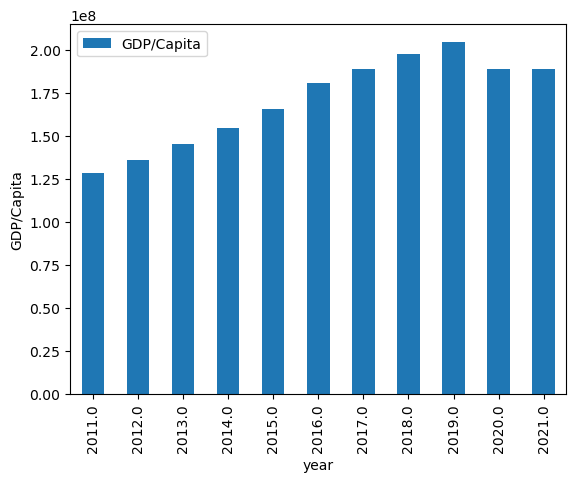

In [48]:
#Plotting grpah of year vs GDP
maha.plot.bar(x='Year',y='GDP/Capita')
plt.xlabel('year')
plt.ylabel('GDP/Capita')

Text(0, 0.5, 'GDP/ Capita')

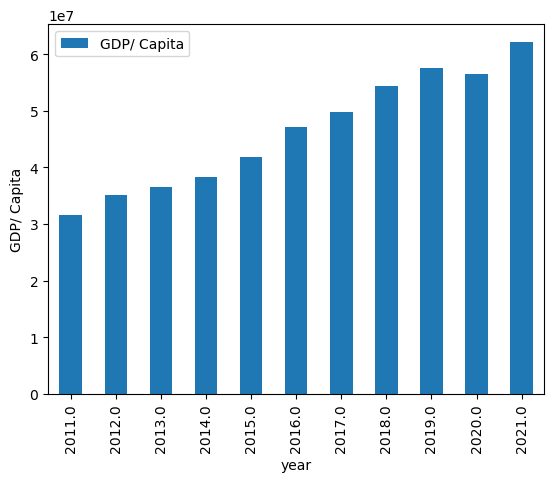

In [49]:
#Plotting grpah of year vs GDP
MP.plot.bar(x='Year',y='GDP/ Capita')
plt.xlabel('year')
plt.ylabel('GDP/ Capita')

In [50]:
x=maha[['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking ']]
y=maha['GDP/Capita']
regr=linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)
MH_coeff=regr.coef_
MH_coeff

[ 1.39995329 -0.4189839   1.56843437  1.31296207 -0.09418241 -0.6960297 ]


array([ 1.39995329, -0.4189839 ,  1.56843437,  1.31296207, -0.09418241,
       -0.6960297 ])

In [51]:
x=MP[['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV Banking']]
y=MP['GDP/ Capita']
regr=linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)
MP_coeff=regr.coef_
MP_coeff

[ 0.96319429  0.18672592  0.83565944  1.81640479 -0.71018358  1.08544149]


array([ 0.96319429,  0.18672592,  0.83565944,  1.81640479, -0.71018358,
        1.08544149])

Text(0.5, 1.0, 'Year vs GAV Agri')

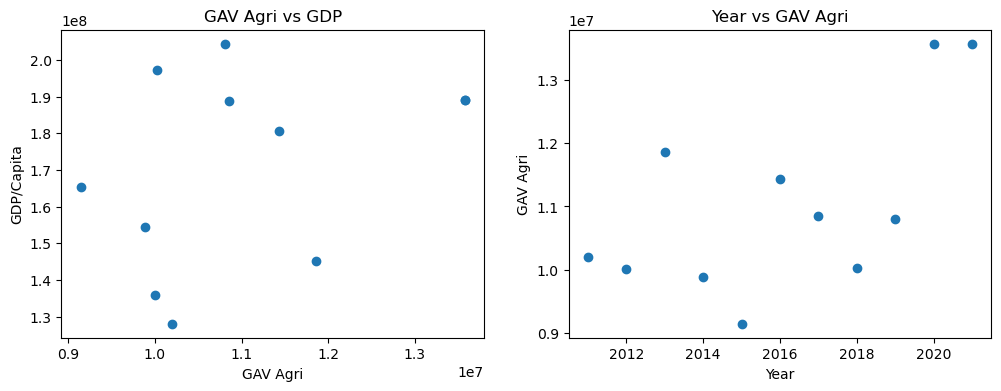

In [52]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(maha['GAV Agri'], maha['GDP/Capita'])
axs[0].set_xlabel('GAV Agri')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Agri vs GDP')


axs[1].scatter(maha['Year'], maha['GAV Agri'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Agri')
axs[1].set_title('Year vs GAV Agri')

Text(0.5, 1.0, 'Year vs GAV Agri')

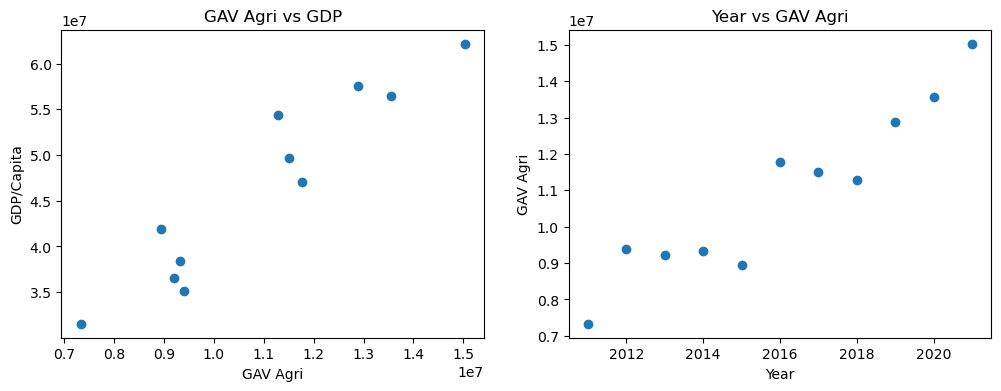

In [53]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(MP['GAV Agri'], MP['GDP/ Capita'])
axs[0].set_xlabel('GAV Agri')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Agri vs GDP')


axs[1].scatter(MP['Year'], MP['GAV Agri'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Agri')
axs[1].set_title('Year vs GAV Agri')

Text(0.5, 1.0, 'Year vs GAV Services')

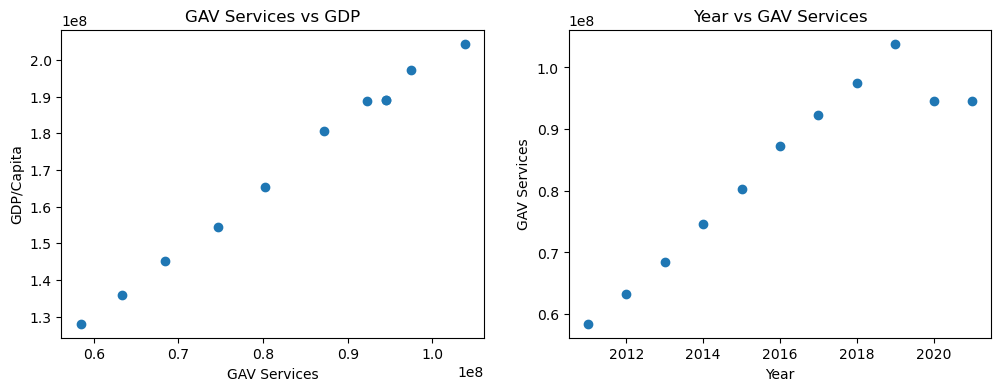

In [54]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(maha['GAV Services'], maha['GDP/Capita'])
axs[0].set_xlabel('GAV Services')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Services vs GDP')


axs[1].scatter(maha['Year'], maha['GAV Services'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Services')
axs[1].set_title('Year vs GAV Services')

Text(0.5, 1.0, 'Year vs GAV Services')

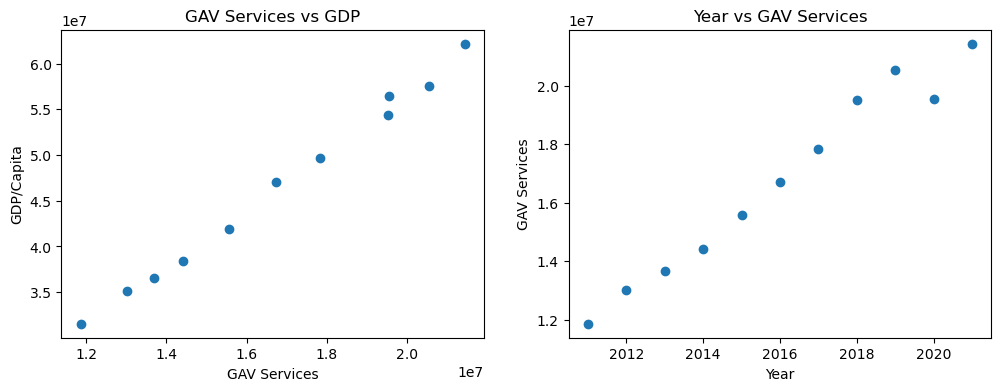

In [55]:
# Create subplots for each independent factor
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Factor1 against GDP
axs[0].scatter(MP['GAV Services'], MP['GDP/ Capita'])
axs[0].set_xlabel('GAV Services')
axs[0].set_ylabel('GDP/Capita')
axs[0].set_title('GAV Services vs GDP')


axs[1].scatter(MP['Year'], MP['GAV Services'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GAV Services')
axs[1].set_title('Year vs GAV Services')

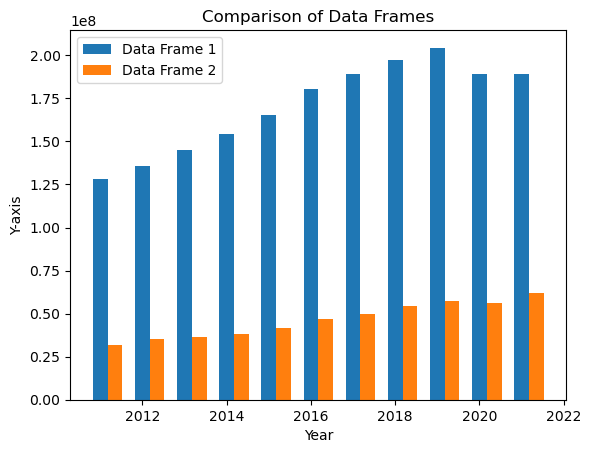

In [56]:



# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GDP/Capita'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GDP/ Capita'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Y-axis')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()


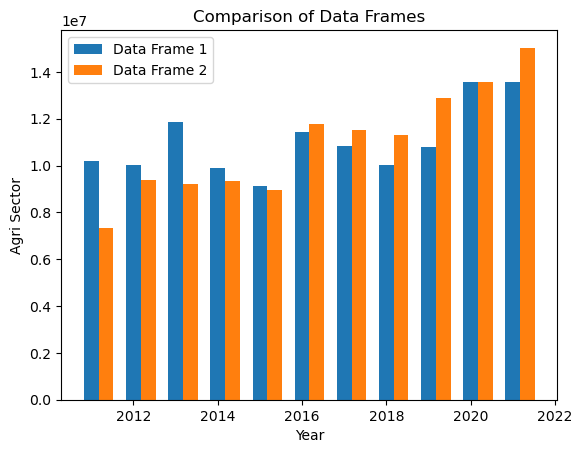

In [57]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Agri'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Agri'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Agri Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

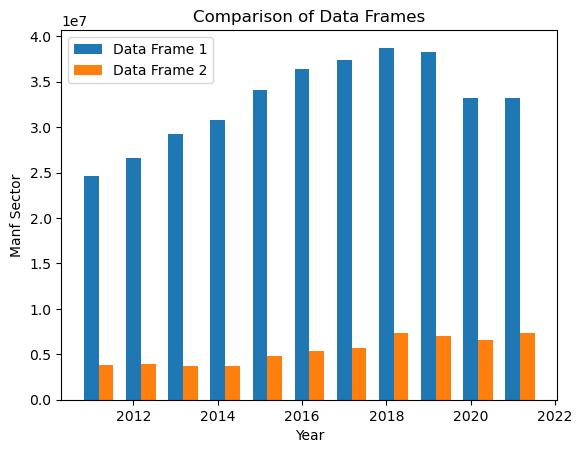

In [58]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Manf'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Manf'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Manf Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

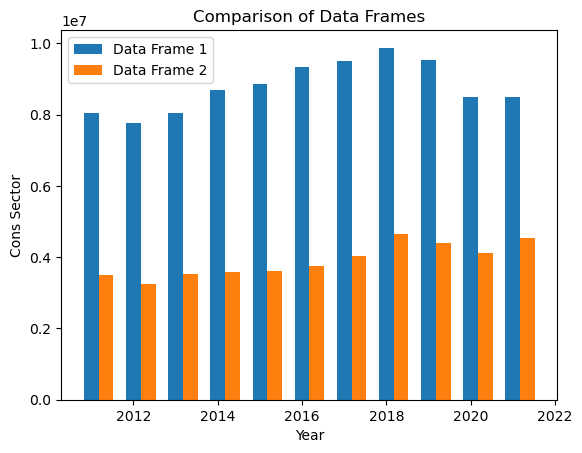

In [59]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Cons'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Cons'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Cons Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

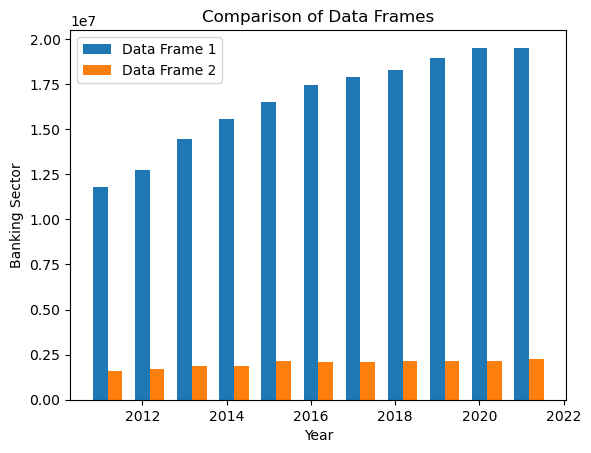

In [60]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV banking '], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Banking'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Banking Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

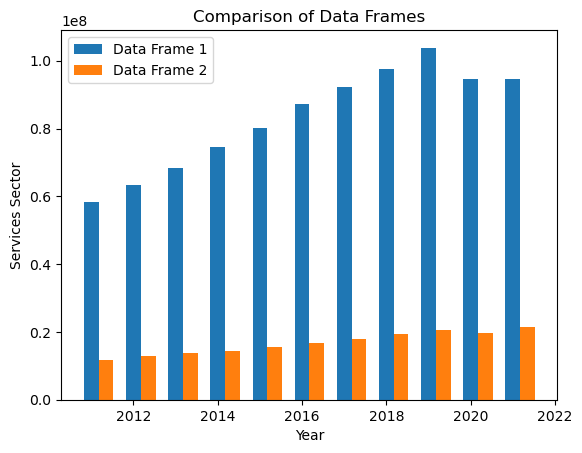

In [61]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Services'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Services'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Services Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

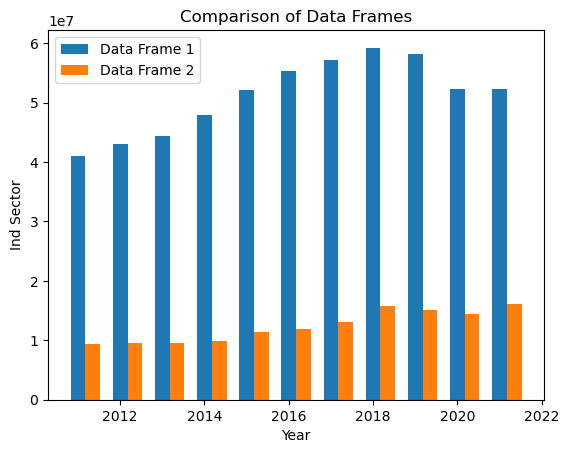

In [62]:
# Set the x-axis values (assuming you have categorical data for the x-axis)
x = maha['Year']

# Set the width of each bar
bar_width = 0.35

# Plotting bars for df1
plt.bar(x, maha['GAV Ind'], width=bar_width, label='Data Frame 1')

# Plotting bars for df2 with an offset
plt.bar(x + bar_width, MP['GAV Ind'], width=bar_width, label='Data Frame 2')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ind Sector')
plt.title('Comparison of Data Frames')

# Set the x-axis tick labels
#plt.xticks(x + bar_width / 2, maha['x'])

# Display legend
plt.legend()

# Show the plot
plt.show()

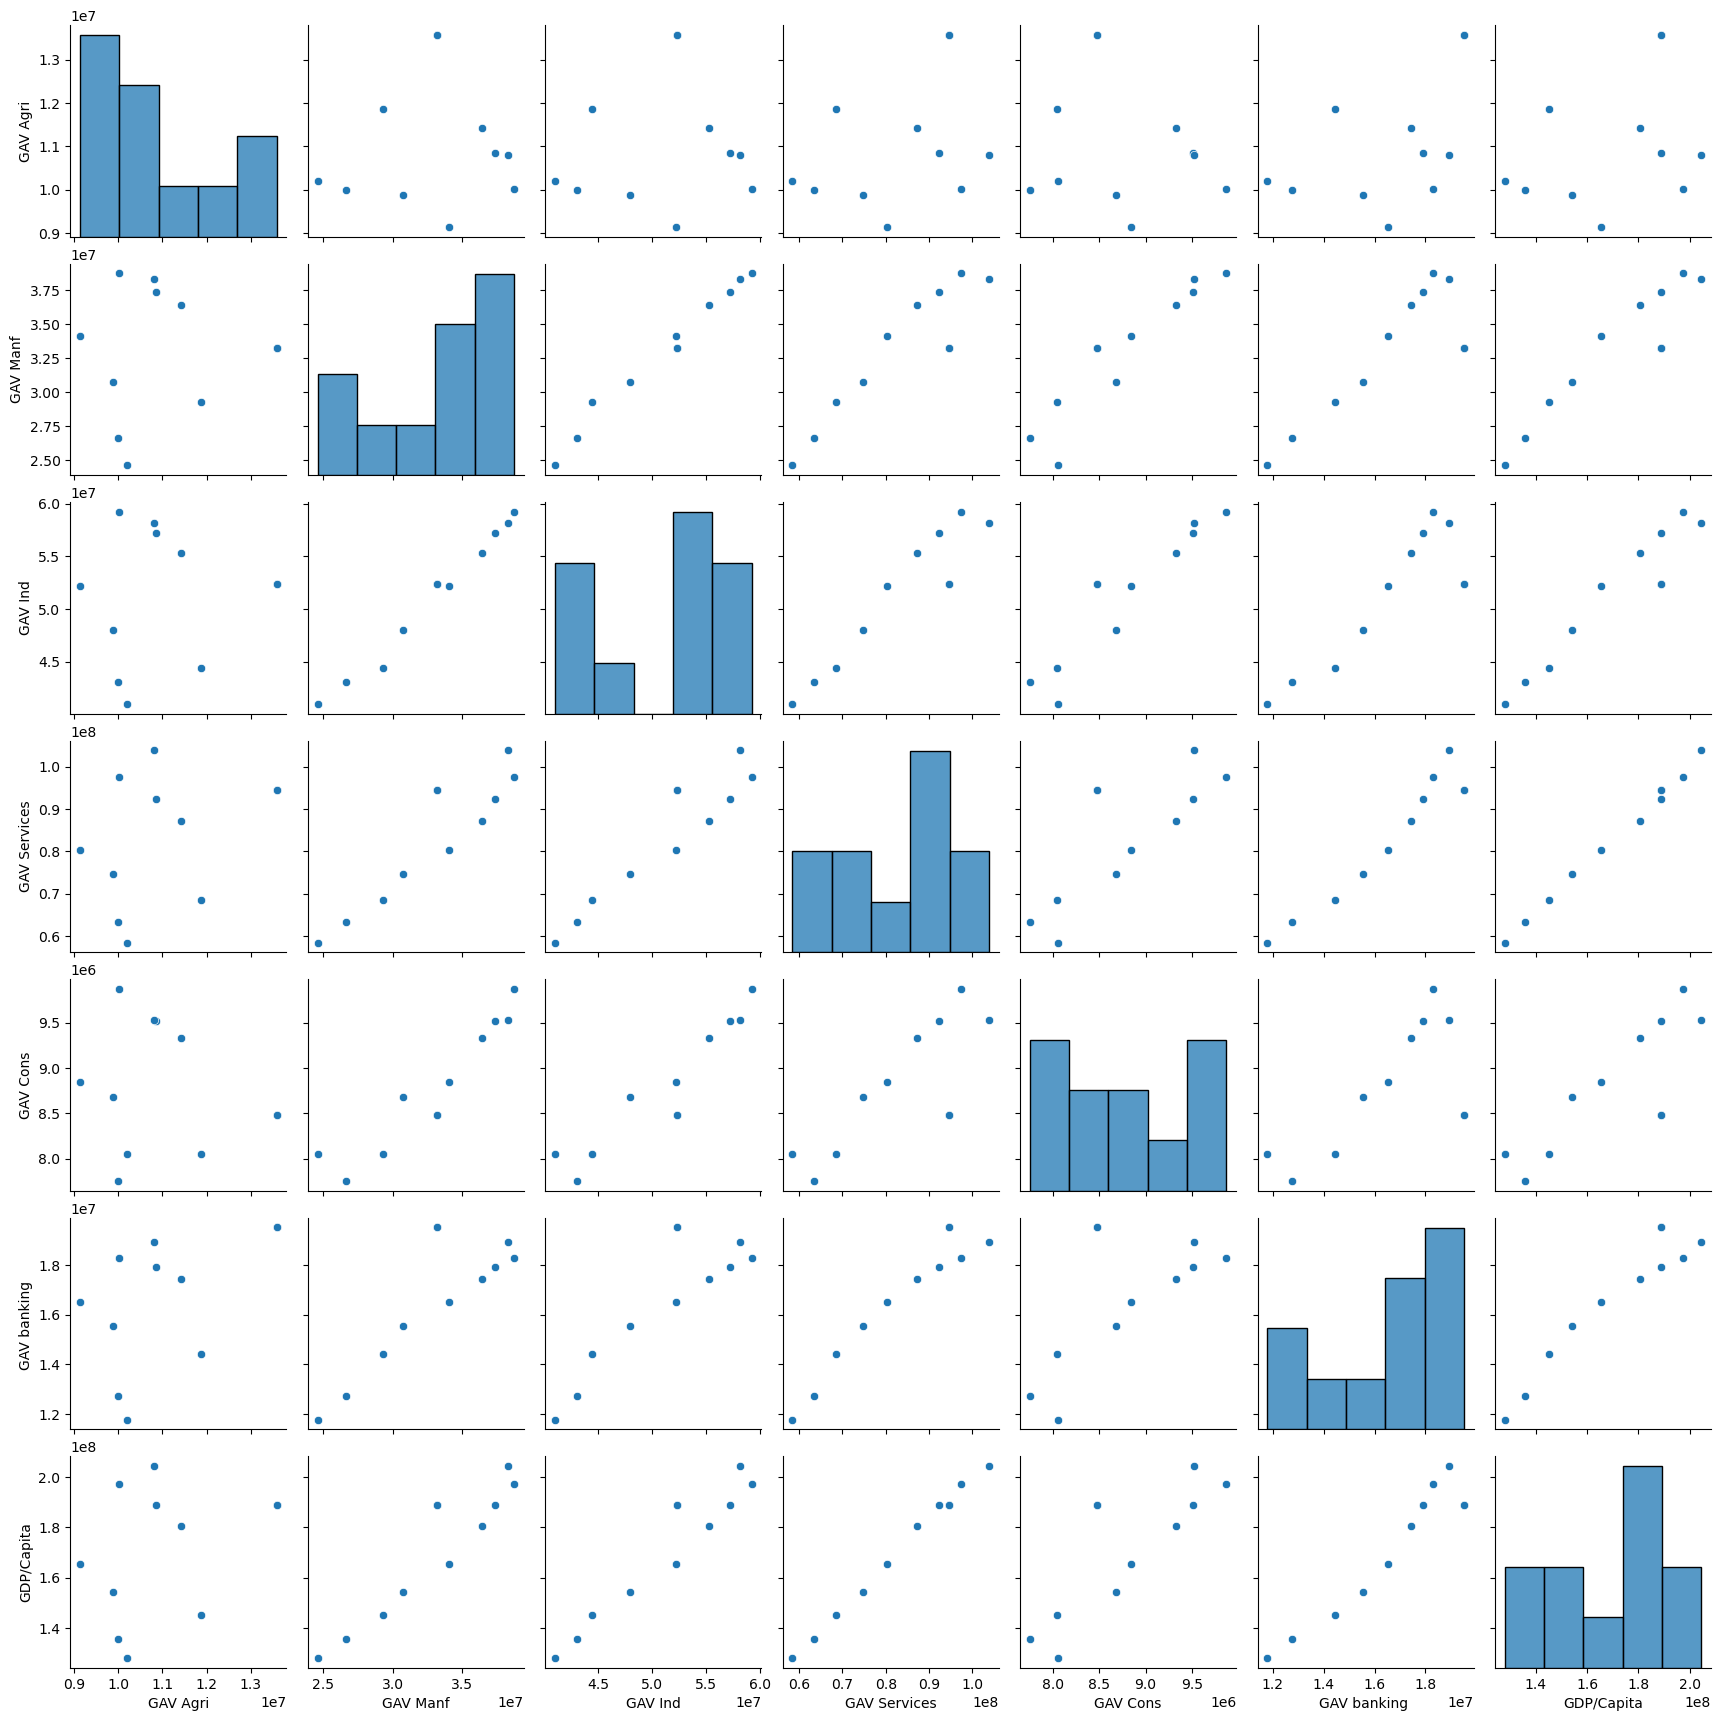

In [63]:
import seaborn as sns
import pandas as pd


# Select the variables you want to include in the scatterplot matrix
variables =['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking ','GDP/Capita']

# Create a subset of the data frame with the selected variables
subset_df = maha[variables]

# Create the scatterplot matrix
sns.pairplot(subset_df)

# Show the plot
plt.show()


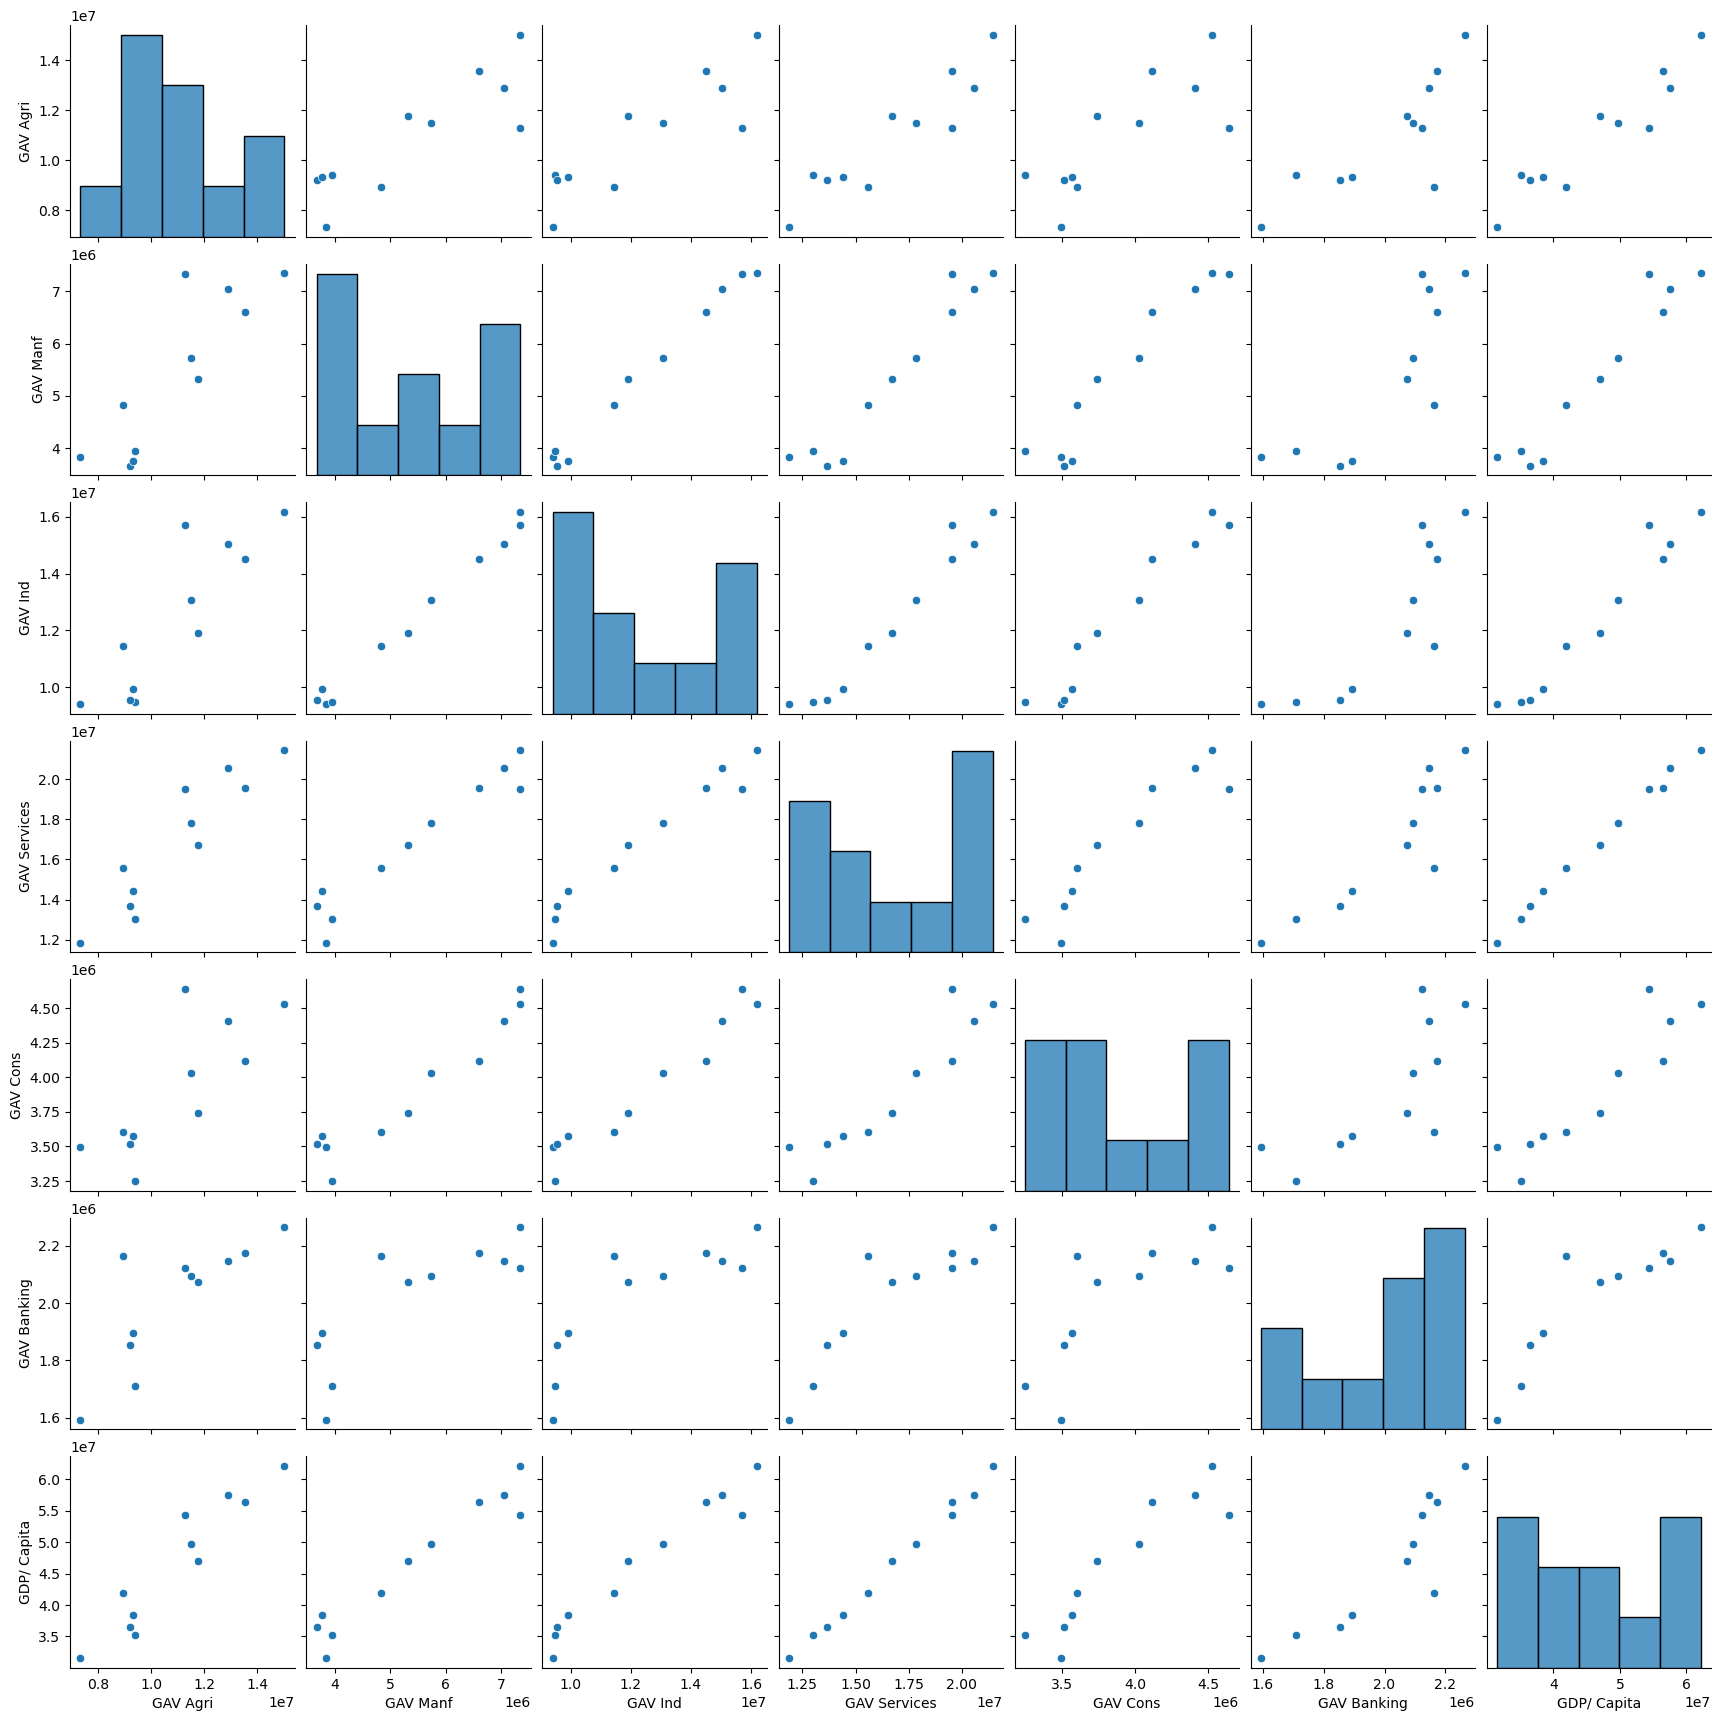

In [64]:
import seaborn as sns
import pandas as pd


# Select the variables you want to include in the scatterplot matrix
variables =['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV Banking','GDP/ Capita']

# Create a subset of the data frame with the selected variables
subset_df = MP[variables]

# Create the scatterplot matrix
sns.pairplot(subset_df)

# Show the plot
plt.show()

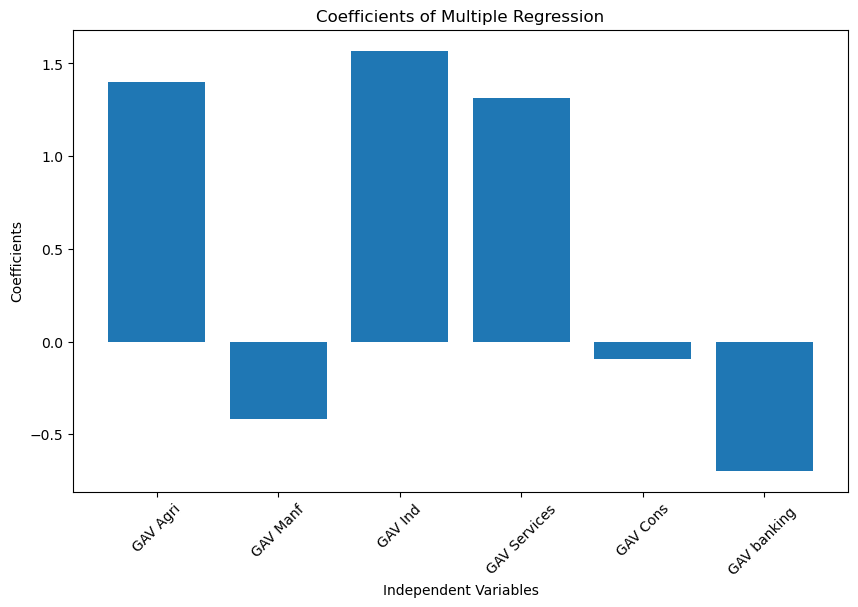

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list or array 'coefficients' containing the coefficients
# and a list or array 'variables' containing the names of the independent variables

# Create a bar plot of the coefficients
variables=['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV banking ']
plt.figure(figsize=(10, 6))
plt.bar(variables, MH_coeff)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients of Multiple Regression')
plt.xticks(rotation=45)
plt.show()


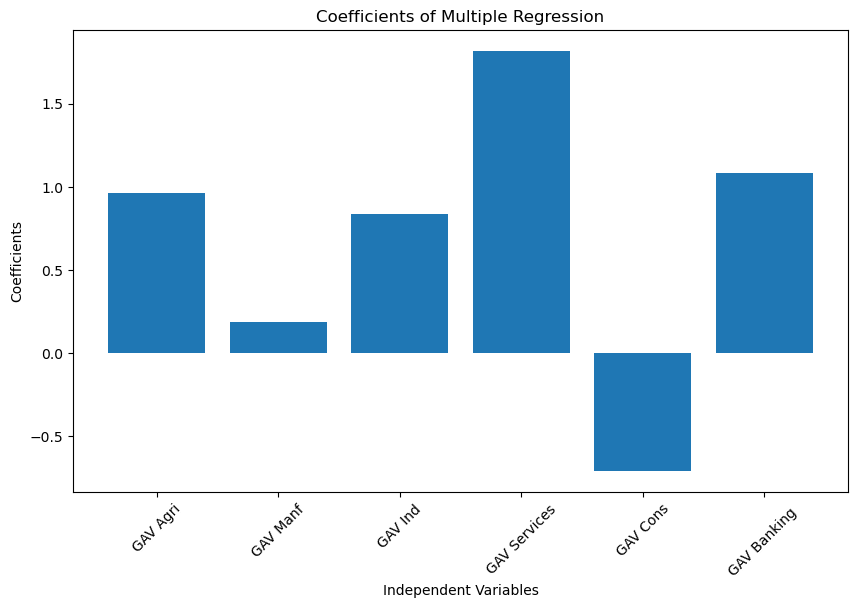

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list or array 'coefficients' containing the coefficients
# and a list or array 'variables' containing the names of the independent variables

# Create a bar plot of the coefficients
variables=['GAV Agri','GAV Manf','GAV Ind','GAV Services','GAV Cons','GAV Banking ']
plt.figure(figsize=(10, 6))
plt.bar(variables, MP_coeff)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients of Multiple Regression')
plt.xticks(rotation=45)
plt.show()

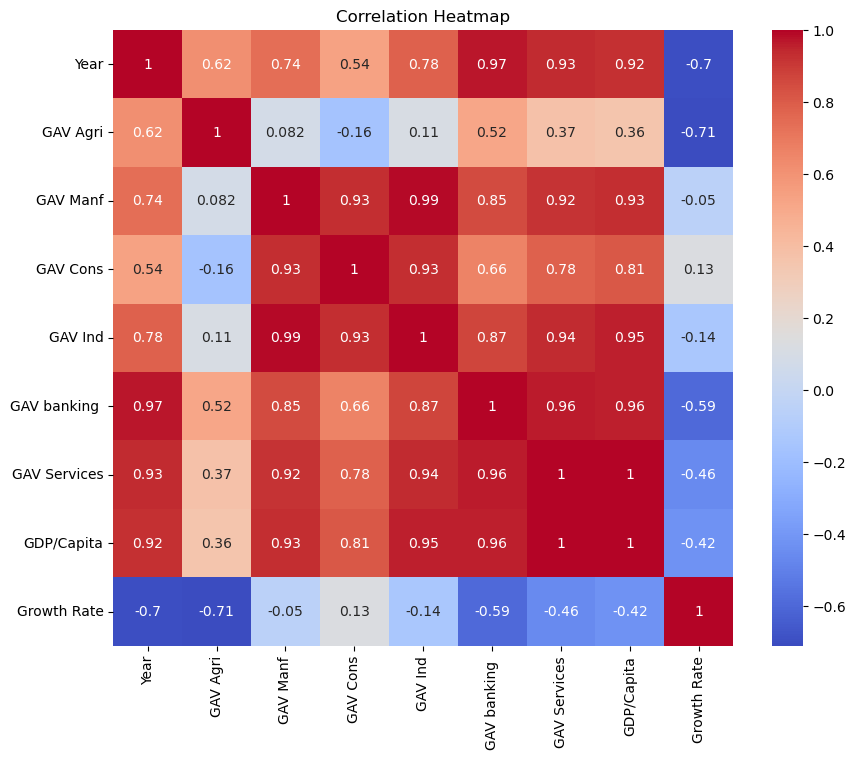

In [67]:

# Assuming you have a pandas DataFrame named 'df' containing your data

# Calculate the correlation matrix
corr_matrix = maha.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


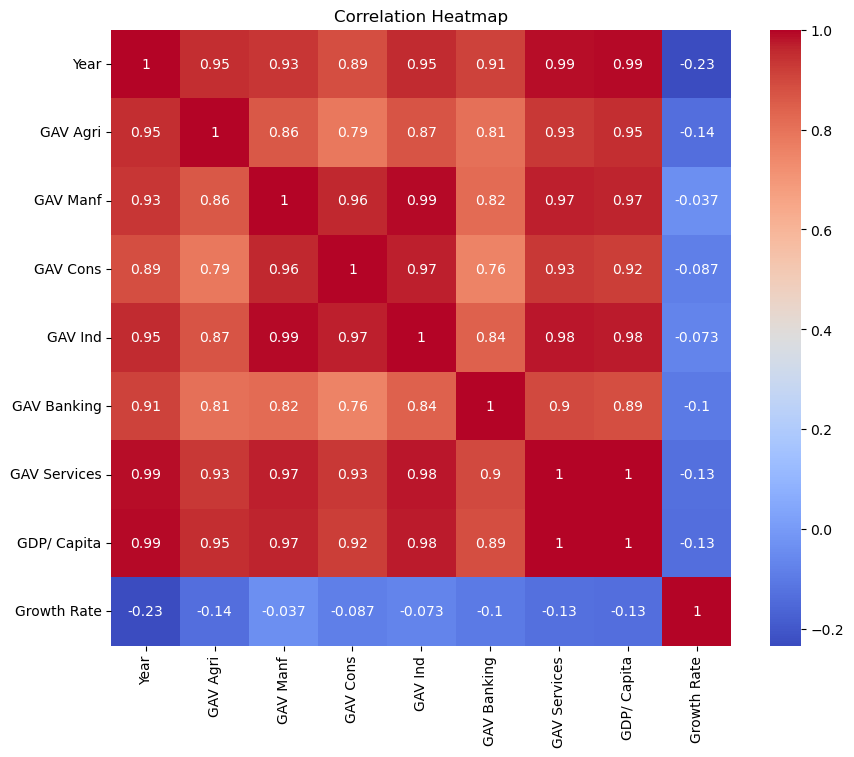

In [68]:

# Calculate the correlation matrix
corr_matrix = MP.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
